# Algorithmic Differentiation Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np

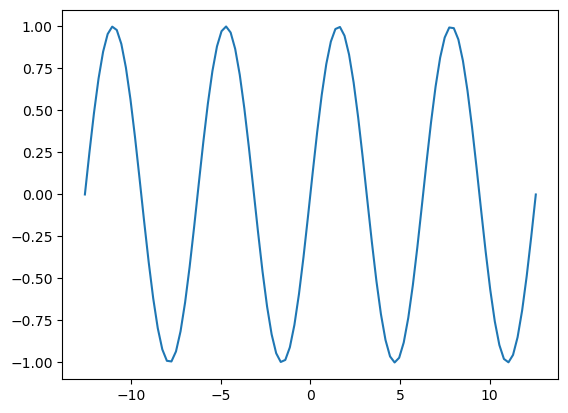

In [2]:
plt.plot(np.linspace(-4*np.pi,4*np.pi,100),np.sin(np.linspace(-4*np.pi,4*np.pi,100)))

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# from torchvision import datasets
# from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch.utils.tensorboard import SummaryWriter

In [4]:
class DenseModel(nn.Module):

    def __init__(self, num_inputs):
        super(DenseModel, self).__init__()
        
        self.layer1 = nn.Linear(num_inputs, 64, dtype=torch.float64)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 64, dtype=torch.float64)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 64, dtype=torch.float64)
        self.activation3 = nn.ReLU()
        self.layer4 = nn.Linear(64, 1, dtype=torch.float64)
        

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        x = self.layer4(x)
        return x

In [5]:
class AlgDiffLearning(nn.Module):
    def __init__(self, model):
        super(AlgDiffLearning, self).__init__()
        
        self.model = model

    def forward(self, x):

        y = self.model(x)
        grad = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y))[0]

        return torch.concatenate([y, grad], dim=1)


tensor([[-1.4605e-01, -7.7447e-03, -1.0038e-02, -2.1882e-02,  7.8487e-03,
          6.3379e-03],
        [-1.4459e-01, -1.2038e-02,  5.3972e-03, -4.7661e-03, -1.8680e-03,
         -1.2552e-02],
        [-1.3843e-01,  1.2715e-03,  6.8434e-03, -1.9509e-02,  1.4825e-02,
          2.1644e-02],
        [-1.4065e-01,  7.4343e-03,  1.7587e-02, -1.8467e-02, -1.5466e-02,
          6.8011e-03],
        [-1.4910e-01, -3.6130e-02, -1.2857e-04, -2.4305e-02, -2.1177e-02,
          2.5644e-02],
        [-1.3891e-01,  6.2638e-03, -1.1021e-04, -2.2995e-02,  4.9746e-03,
          9.0866e-04],
        [-1.4781e-01,  1.0080e-03,  8.0422e-03, -2.2893e-02, -6.7898e-03,
          7.1381e-03],
        [-1.4431e-01, -5.4862e-03, -2.4338e-03, -2.2938e-03,  7.5359e-03,
         -1.3648e-02],
        [-1.6344e-01, -1.3812e-03,  3.3394e-02, -1.0961e-02, -1.2647e-02,
          2.0118e-02],
        [-1.4212e-01, -1.0154e-02, -5.8182e-03,  2.6288e-03, -1.6499e-02,
         -3.5042e-03]], dtype=torch.float64, grad_fn=

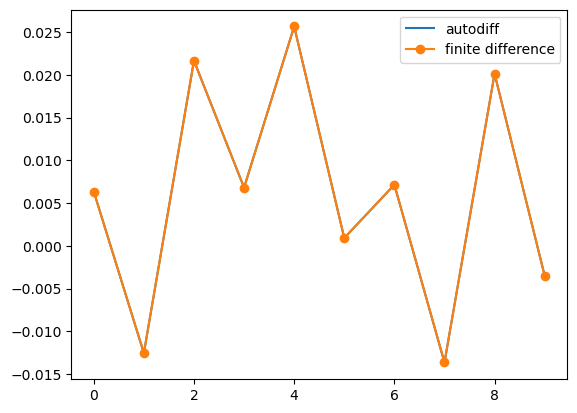

In [10]:
model = DenseModel(num_inputs=5)

algdiffmodel = AlgDiffLearning(model)

x = torch.rand(10, 5, dtype=torch.float64, requires_grad=True)

y = algdiffmodel(x)

print(y)

col = 4
ep = 1e-6

x__ = x.clone()

x__[:, col] += torch.tensor(ep)

y2 = algdiffmodel(x__)

test = (y2[:, 0] - y[:, 0]) / ep

print(test)

plt.plot(y[:,col+1].detach().numpy(), label='autodiff')

plt.plot(test.detach().numpy(), label='finite difference', marker='o')

plt.legend()


In [20]:

print(algdiffmodel)


AlgDiffLearning(
  (model): DenseModel(
    (layer1): Linear(in_features=5, out_features=64, bias=True)
    (activation1): ReLU()
    (layer2): Linear(in_features=64, out_features=64, bias=True)
    (activation2): ReLU()
    (layer3): Linear(in_features=64, out_features=64, bias=True)
    (activation3): ReLU()
    (layer4): Linear(in_features=64, out_features=1, bias=True)
  )
)
